In [9]:
!pip3 install simpletransformers

     |████████████████████████████████| 151 kB 1.4 MB/s eta 0:00:01
  Created wheel for seqeval: filename=seqeval-0.0.12-py3-none-any.whl size=7422 sha256=447a959a365491e28bb440e66159f0e6fbfd685df700b7cbcc3caec1be0cdd4f
  Stored in directory: /Users/IlanaWeinstein/Library/Caches/pip/wheels/dc/cc/62/a3b81f92d35a80e39eb9b2a9d8b31abac54c02b21b2d466edc
Successfully built seqeval


In [2]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

In [39]:
data_path = '/Users/IlanaWeinstein/Desktop/Cadent/sentiment-analysis-on-movie-reviews'
train = pd.DataFrame(pd.read_csv(data_path + '/' + 'train.tsv', sep='\t'))
test = pd.DataFrame(pd.read_csv(data_path + '/' + 'test.tsv', sep='\t'))

In [40]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [41]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


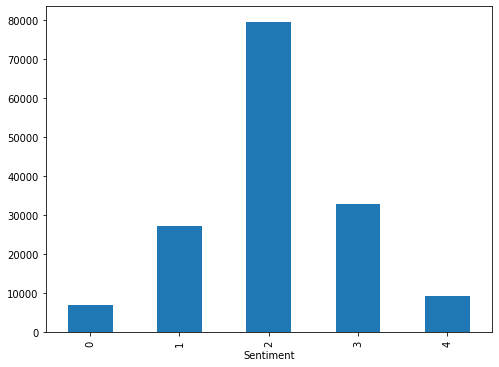

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
train.groupby('Sentiment').Phrase.count().plot.bar(ylim=0)
plt.show()

In [43]:
train_df = train[['Phrase','Sentiment']]

In [44]:
train_df.columns = ['text','label']

In [45]:
train_df['text'] = train_df['text'].apply(lambda x: x.replace('\\', ' '))
# train_df['label'] = train_df['label'].apply(lambda x:x-1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
train_df

,text,label
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2
5,of escapades demonstrating the adage that what...,2
6,of,2
7,escapades demonstrating the adage that what is...,2
8,escapades,2
9,demonstrating the adage that what is good for ...,2


In [36]:
from simpletransformers.classification import ClassificationModel


# Create a ClassificationModel
model = ClassificationModel('roberta', 'roberta-base', num_labels=5, use_cuda=False)

04/18/2020 17:10:26 - INFO - transformers.configuration_utils -   loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-config.json from cache at /Users/IlanaWeinstein/.cache/torch/transformers/e1a2a406b5a05063c31f4dfdee7608986ba7c6393f7f79db5e69dcd197208534.a7ab0e5de2d8321d6d6a15b199110f2c99be72976b7d151423cb8d8c261a13b6
04/18/2020 17:10:26 - INFO - transformers.configuration_utils -   Model config RobertaConfig {
  "_num_labels": 5,
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bad_words_ids": null,
  "bos_token_id": 0,
  "decoder_start_token_id": null,
  "do_sample": false,
  "early_stopping": false,
  "eos_token_id": 2,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  

04/18/2020 17:13:08 - INFO - transformers.file_utils -   storing https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-pytorch_model.bin in cache at /Users/IlanaWeinstein/.cache/torch/transformers/228756ed15b6d200d7cb45aaef08c087e2706f54cb912863d2efe07c89584eb7.49b88ba7ec2c26a7558dda98ca3884c3b80fa31cf43a1b1f23aef3ff81ba344e
04/18/2020 17:13:08 - INFO - transformers.file_utils -   creating metadata file for /Users/IlanaWeinstein/.cache/torch/transformers/228756ed15b6d200d7cb45aaef08c087e2706f54cb912863d2efe07c89584eb7.49b88ba7ec2c26a7558dda98ca3884c3b80fa31cf43a1b1f23aef3ff81ba344e
04/18/2020 17:13:08 - INFO - filelock -   Lock 4382502192 released on /Users/IlanaWeinstein/.cache/torch/transformers/228756ed15b6d200d7cb45aaef08c087e2706f54cb912863d2efe07c89584eb7.49b88ba7ec2c26a7558dda98ca3884c3b80fa31cf43a1b1f23aef3ff81ba344e.lock
04/18/2020 17:13:08 - INFO - transformers.modeling_utils -   loading weights file https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-

04/18/2020 17:13:15 - INFO - transformers.modeling_utils -   Weights of RobertaForSequenceClassification not initialized from pretrained model: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
04/18/2020 17:13:15 - INFO - transformers.modeling_utils -   Weights from pretrained model not used in RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
04/18/2020 17:13:16 - INFO - filelock -   Lock 5555266504 acquired on /Users/IlanaWeinstein/.cache/torch/transformers/d0c5776499adc1ded22493fae699da0971c1ee4c2587111707a4d177d20257a2.ef00af9e673c7160b4d41cfda1f48c5f4cba57d5142754525572a846a1ab1b9b.lock
04/18/2020 17:13:16 - INFO - transformers.file_utils -   https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-vocab.json not found in cache or force_download set to True, downloading to /Users/Ilana

04/18/2020 17:13:16 - INFO - transformers.file_utils -   storing https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-vocab.json in cache at /Users/IlanaWeinstein/.cache/torch/transformers/d0c5776499adc1ded22493fae699da0971c1ee4c2587111707a4d177d20257a2.ef00af9e673c7160b4d41cfda1f48c5f4cba57d5142754525572a846a1ab1b9b
04/18/2020 17:13:16 - INFO - transformers.file_utils -   creating metadata file for /Users/IlanaWeinstein/.cache/torch/transformers/d0c5776499adc1ded22493fae699da0971c1ee4c2587111707a4d177d20257a2.ef00af9e673c7160b4d41cfda1f48c5f4cba57d5142754525572a846a1ab1b9b
04/18/2020 17:13:16 - INFO - filelock -   Lock 5555266504 released on /Users/IlanaWeinstein/.cache/torch/transformers/d0c5776499adc1ded22493fae699da0971c1ee4c2587111707a4d177d20257a2.ef00af9e673c7160b4d41cfda1f48c5f4cba57d5142754525572a846a1ab1b9b.lock
04/18/2020 17:13:16 - INFO - filelock -   Lock 5555266504 acquired on /Users/IlanaWeinstein/.cache/torch/transformers/b35e7cd126cd4229a746b5d5c29a749e8e84

04/18/2020 17:13:16 - INFO - transformers.file_utils -   storing https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-merges.txt in cache at /Users/IlanaWeinstein/.cache/torch/transformers/b35e7cd126cd4229a746b5d5c29a749e8e84438b14bcdb575950584fe33207e8.70bec105b4158ed9a1747fea67a43f5dee97855c64d62b6ec3742f4cfdb5feda
04/18/2020 17:13:16 - INFO - transformers.file_utils -   creating metadata file for /Users/IlanaWeinstein/.cache/torch/transformers/b35e7cd126cd4229a746b5d5c29a749e8e84438b14bcdb575950584fe33207e8.70bec105b4158ed9a1747fea67a43f5dee97855c64d62b6ec3742f4cfdb5feda
04/18/2020 17:13:16 - INFO - filelock -   Lock 5555266504 released on /Users/IlanaWeinstein/.cache/torch/transformers/b35e7cd126cd4229a746b5d5c29a749e8e84438b14bcdb575950584fe33207e8.70bec105b4158ed9a1747fea67a43f5dee97855c64d62b6ec3742f4cfdb5feda.lock
04/18/2020 17:13:16 - INFO - transformers.tokenization_utils -   loading file https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-vocab.json 

In [47]:
train_df

,text,label
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2
5,of escapades demonstrating the adage that what...,2
6,of,2
7,escapades demonstrating the adage that what is...,2
8,escapades,2
9,demonstrating the adage that what is good for ...,2


In [49]:
model.train_model(train_df)

04/18/2020 17:39:05 - INFO - simpletransformers.classification.classification_model -    Converting to features started. Cache is not used.


Running loss: 1.527812

//anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 1.695924

KeyboardInterrupt: 

In [13]:
# X_train = train.drop(['Sentiment'], axis=1)
# y_train = train['Sentiment']

# X_test = test
# # y_test = test['Sentiment']

In [14]:
train_texts, train_labels = X_train['Phrase'], y_train
val_texts = X_test['Phrase']

In [15]:
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm

from transformers import BertTokenizer, BertModel

In [16]:
MODEL_TYPE = 'bert-base-uncased'
MAX_SIZE = 150
BATCH_SIZE = 200

In [17]:
tokenizer = BertTokenizer.from_pretrained(MODEL_TYPE)
model = BertModel.from_pretrained(MODEL_TYPE)

In [18]:
tokenized_input = X_train['Phrase'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [19]:
print(tokenized_input[1])
print("Here 101 -> [CLS] and 102 -> [SEP]")

[101, 1037, 2186, 1997, 9686, 17695, 18673, 14313, 1996, 15262, 3351, 2008, 2054, 2003, 2204, 2005, 1996, 13020, 102]
Here 101 -> [CLS] and 102 -> [SEP]


In [20]:
#Padding
padded_tokenized_input = np.array([i + [0]*(MAX_SIZE-len(i)) for i in tokenized_input.values])

In [21]:
print(padded_tokenized_input[0])

[  101  1037  2186  1997  9686 17695 18673 14313  1996 15262  3351  2008
  2054  2003  2204  2005  1996 13020  2003  2036  2204  2005  1996 25957
  4063  1010  2070  1997  2029  5681  2572 25581  2021  3904  1997  2029
  8310  2000  2172  1997  1037  2466  1012   102     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0]


In [22]:
attention_masks  = np.where(padded_tokenized_input != 0, 1, 0)

In [23]:
print(attention_masks[0])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [24]:
input_ids = torch.tensor(padded_tokenized_input)  
attention_masks = torch.tensor(attention_masks)

In [25]:
all_train_embedding = []

with torch.no_grad():
    for i in tqdm(range(0,len(input_ids),200)):    
        last_hidden_states = model(input_ids[i:min(i+200,len(train_texts))], attention_mask = attention_masks[i:min(i+200,len(train_texts))])[0][:,0,:].numpy()
        all_train_embedding.append(last_hidden_states)

  0%|          | 1/781 [01:37<21:10:18, 97.72s/it]

KeyboardInterrupt: 

In [ ]:
unbatched_train = []
for batch in all_train_embedding:
    for seq in batch:
        unbatched_train.append(seq)

train_labels = train_df['target']

## Data Processing

The task is to create bag-of-words features: tokenize the text, index each token, represent the sentence as a dictionary of tokens and their counts, limit the vocabulary to $n$ most frequent tokens. In the lab we use built-in `sklearn` function, `sklearn.feature_extraction.text.CountVectorizer`. 
**In this HW, you are required to implement the `Vectorizer` on your own without using `sklearn` built-in functions.**

Function `preprocess_data` takes the list of texts and returns list of (lists of tokens). 
You may use [spacy](https://spacy.io/) or [nltk](https://www.nltk.org/) text processing libraries in `preprocess_data` function. 

Class `Vectorizer` is used to vectorize the text and to create a matrix of features.


In [5]:
# !pip3 install spacy
!python3 -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [6]:
import spacy
import en_core_web_sm
# nlp = en_core_web_sm.load()

In [7]:
from tqdm import tqdm

def preprocess_data(data):
    
    preprocessed_data = []
#     nlp = spacy.load("en_core_web_sm")
    nlp = en_core_web_sm.load()
    
    #new to spacy, decided to not change any settings
    for text in tqdm(data):
        doc = nlp(text)
        new_list = []
        for token in doc:
            new_list.append(token.text)
        preprocessed_data.append(new_list)
    

    return preprocessed_data

In [8]:
test_train = train_texts[:int(.5 * len(train_texts))]
test_val = val_texts[:int(.5 * len(val_texts))]

In [9]:
a = len(test_train)
a

78030

In [10]:
b = len(test_val)
b

33146

In [11]:
# takes  while to run 

# train_data = preprocess_data(train_texts)
# print('Done train')
# val_data = preprocess_data(val_texts)

print('Preprocessing training...')
train_data = preprocess_data(test_train)
print('Done preprocessing training.')
print('Preprocessing testing...')
val_data = preprocess_data(test_val)
print('Done preprocessing testing.')

Preprocessing training...


100%|██████████| 78030/78030 [10:45<00:00, 120.84it/s]


Done preprocessing training.
Preprocessing testing...


100%|██████████| 33146/33146 [04:15<00:00, 129.90it/s]


Done preprocessing testing.


In [12]:
train_data

[['A',
  'series',
  'of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose',
  'is',
  'also',
  'good',
  'for',
  'the',
  'gander',
  ',',
  'some',
  'of',
  'which',
  'occasionally',
  'amuses',
  'but',
  'none',
  'of',
  'which',
  'amounts',
  'to',
  'much',
  'of',
  'a',
  'story',
  '.'],
 ['A',
  'series',
  'of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['A', 'series'],
 ['A'],
 ['series'],
 ['of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['of'],
 ['escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['escapades'],
 ['demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['demonstrating', 'the', 'adage'],
 ['demonstrating'

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(train['Phrase']).toarray()
labels = train_labels
features.shape

(156060, 54911)

0.0

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(train['Sentiment'].items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [13]:
class Vectorizer():
    def __init__(self, max_features):
        self.max_features = max_features
        self.vocab_list = None
        self.token_to_index = None

    def fit(self, dataset):
        # Create a vocab list, self.vocab_list, using the most frequent "max_features" tokens
        
        vocab_master = np.array([ elem for row in dataset for elem in row])
        
        word_list,count = np.unique(vocab_master,return_counts = True)
        word_list_sorted = word_list[np.argsort(-count)]
        
        self.vocab_list = word_list_sorted[:self.max_features]

        # Create a token indexer, self.token_to_index, that will return index of the token in self.vocab_list
        self.token_to_index = {}

        for i,word in enumerate(self.vocab_list):
            self.token_to_index[word] = i
        
        pass

    def transform(self, dataset):
        # This function transforms text dataset into a matrix, data_matrix
        """
        YOUR CODE GOES HERE
        """
        #dictionary, append count of words only in that row
        data_matrix = np.zeros((len(dataset), len(self.vocab_list)))
        for i,row in enumerate(dataset):
            for word in row:
                data_matrix[i][self.token_to_index.get(word)] += 1
  
        
        return data_matrix

In [14]:
max_features = 1000 # TODO: Replace None with a number
vectorizer = Vectorizer(max_features=max_features)
vectorizer.fit(train_data)
X_train = vectorizer.transform(train_data)
X_val = vectorizer.transform(val_data)
# X_test = vectorizer.transform(test_data)

y_train = np.array(train_labels[:a]) #remove slice with full dataset 
# y_val = np.array(val_labels[:19887])
# y_test = np.array(test_labels)

vocab = vectorizer.vocab_list

In [15]:
X_train

array([[10.,  8.,  8., ...,  7.,  7.,  7.],
       [ 6.,  4.,  4., ...,  4.,  4.,  4.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [11., 13., 10., ..., 10., 10., 10.],
       [11., 13., 10., ..., 10., 10., 10.],
       [11., 13., 10., ..., 10., 10., 10.]])

In [16]:
vocab

array(['the', ',', 'a', 'of', 'and', '-', 'to', '.', "'s", 'in', 'is',
       'that', 'it', 'as', 'with', 'for', 'film', 'its', 'movie', 'an',
       'but', 'this', '`', 'on', 'be', 'The', 'more', 'you', 'than', "'",
       'one', "n't", 'his', 'by', 'about', 'not', 'at', 'all', 'from',
       'or', 'like', '--', 'are', 'have', 'so', '-RRB-', 'A', 'story',
       'out', 'has', 'up', 'good', 'who', '-LRB-', 'most', 'too', 'their',
       'I', 'time', 'much', 'life', 'characters', 'comedy', 'into',
       'some', '...', 'can', 'your', 'does', 'little', 'no', 'very', "''",
       'well', 'funny', 'just', 'any', 'way', 'what', 'movies', 'make',
       'only', 'will', 'enough', 'her', 'even', 'own', 'been', 'which',
       'action', 'us', 'if', 'them', 'through', 'do', 'would', 'It',
       'old', 'off', 'he', 'love', 'other', 'director', 'was', 'bad',
       'work', 'many', 'something', 'two', 'makes', 'character', 'we',
       'when', 'drama', 'self', 'never', 'films', 'best', 'over', 'ne

## Model

We train logistic regression model and save prediction for train, val and test.

  0%|          | 0/4 [00:00<?, ?it/s]
0it [00:00, ?it/s]
 25%|██▌       | 1/4 [01:29<04:29, 89.76s/it]
0it [00:00, ?it/s]
 50%|█████     | 2/4 [56:35<35:08, 1054.47s/it]
0it [00:00, ?it/s]
 75%|███████▌  | 3/4 [56:39<12:19, 739.42s/it] 
0it [00:00, ?it/s]
100%|██████████| 4/4 [1:08:17<00:00, 726.87s/it]


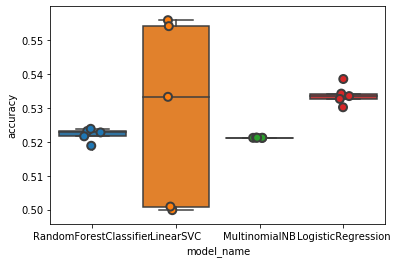

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0,solver='sag', multi_class = 'multinomial'),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in tqdm(models):
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='f1_micro', cv=CV)
    for fold_idx, accuracy in tqdm(enumerate(accuracies)):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [01:29<00:00, 89.32s/it]


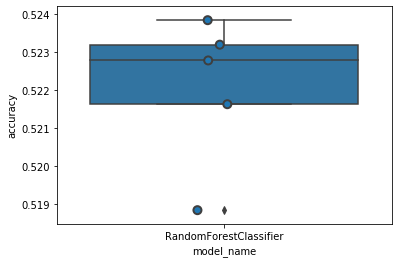

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
#     LinearSVC(),
#     MultinomialNB(),
#     LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in tqdm(models):
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='f1_micro', cv=CV)
    for fold_idx, accuracy in tqdm(enumerate(accuracies)):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model
logr = LogisticRegression(random_state=0, solver='sag', multi_class = 'multinomial')

# Fit the model to training data
logr.fit(X_train, y_train)

# Make prediction using the trained model
y_train_pred = logr.predict(X_train)
y_val_pred = logr.predict(X_val)
# y_test_pred = model.predict(X_test)

In [18]:
y_train_pred

array([3, 2, 2, ..., 3, 3, 3])

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model
logr = LogisticRegression(random_state=0, solver='sag', multi_class = 'multinomial')

# Fit the model to training data
logr.fit(features, labels)

# Make prediction using the trained model
y_train_pred = logr.predict(features)
y_val_pred = logr.predict(X_val)
# y_test_pred = model.predict(X_test)

## Accuracy ## 

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [20]:
print(f"Training accuracy: {accuracy_score(y_train, y_train_pred,):.3f}")
print(f"F1 score: {f1_score(y_train, y_train_pred, average = 'micro'):.3f}")
print(f"F1 score: {f1_score(y_train, y_train_pred, average = 'macro'):.3f}")
# print(f"Validation accuracy: {accuracy_score(y_val, y_val_pred):.3f}, "
#       f"F1 score: {f1_score(y_val, y_val_pred):.3f}")
# print(f"Test accuracy: {accuracy_score(y_test, y_test_pred):.3f}, "
#       f"F1 score: {f1_score(y_test, y_test_pred):.3f}")

Training accuracy: 0.538
F1 score: 0.538
F1 score: 0.207
